## Contribution to W. Olson review paper

### Version 3: Updates to Figure 2

Figure 2: slide v. twist scatter with 1-sigma, 2-sigma, 3-sigma contours of 512 random tetrameric points of (a) internal CA and (b) internal AC
- make sure the contour lines are for the full tetrameric dataset

Objectives: improvements & fine-tuning for publication


In [24]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText

path = os.getcwd()

In [25]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, );     Input data.
    ax : matplotlib.axes.Axes;          The axes object to draw the ellipse into.
    n_std : float;                      The number of standard deviations to determine the ellipse's radiuses.
    **kwargs;                           Forwarded to `~matplotlib.patches.Ellipse`
    Returns                             matplotlib.patches.Ellipse
    -------
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov     = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    # Using a special case to obtain the eigenvalues of this two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from the squareroot of the variance and multiplying with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


Need to update: randomly select 32 step values for each of the 16 tetramers based on the internal AC or CA dimer

In [26]:
tet_dataset  = pd.read_csv("datafiles/czapla2022_3sig_tet", index_col=0)

plot_ac_df = tet_dataset[tet_dataset.step_dimer=="AC"].reset_index(drop=True)
plot_ca_df = tet_dataset[tet_dataset.step_dimer=="CA"].reset_index(drop=True)

del tet_dataset

/tmp/ipykernel_11620/594668138.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, tet_df])
/tmp/ipykernel_11620/594668138.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, tet_df])


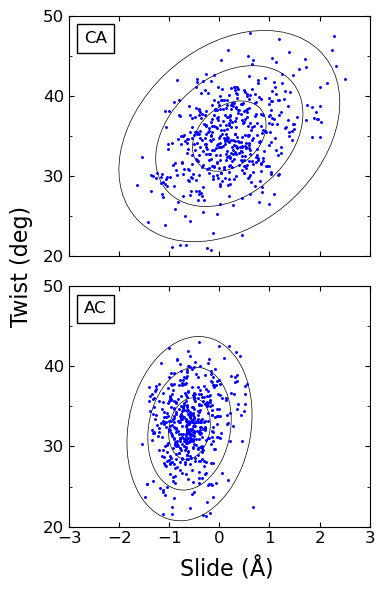

<Figure size 640x480 with 0 Axes>

In [44]:
random_state_value = 828

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, 
                               figsize=(4,6), 
                               sharey=True, sharex=True)

color_scatter = "blue"
color_contour = "black"
colors   = {i:color_contour for i in range(3)} 

# -------------------------------------------------------------------------------------------------------------------------------

# AC needs to be on the BOTTOM
plot_df = pd.DataFrame(columns=plot_ac_df.columns)
plot_tets = [i+"AC"+j for i in ['A','T','C','G'] for j in ['A','T','C','G']]
for TET in plot_tets:
    tet_df = plot_ac_df[plot_ac_df.step_tetramer==TET].copy().reset_index(drop=True).sample(n=32, random_state=random_state_value)
    plot_df = pd.concat([plot_df, tet_df])
    #print(TET, len(tet_df), len(plot_df))
    del tet_df
del plot_tets
plot_df.to_csv("fig2_v3_fulldata_ac")

ax1.scatter(x = plot_df.slide,
            y = plot_df.twist, 
            marker=".", s=5, color=color_scatter, label="AC")
at = AnchoredText("AC", prop=dict(size=12), frameon=True, loc='upper left')
at.patch.set_boxstyle("square,pad=0.")
ax1.add_artist(at)
del at 
for i in range(3):
    confidence_ellipse(plot_ac_df.slide,plot_ac_df.twist,
                       ax1, n_std=i+1,
                       edgecolor=colors[i], linestyle='-', linewidth=0.5, zorder=0)
del plot_df

# -------------------------------------------------------------------------------------------------------------------------------

# ... and CA needs to be at the TOP
plot_df = pd.DataFrame(columns=plot_ca_df.columns)
plot_tets = [i+"CA"+j for i in ['A','T','C','G'] for j in ['A','T','C','G']]
for TET in plot_tets:
    tet_df = plot_ca_df[plot_ca_df.step_tetramer==TET].copy().reset_index(drop=True).sample(n=32, random_state=random_state_value)
    plot_df = pd.concat([plot_df, tet_df])
    #print(TET, len(tet_df), len(plot_df))
    del tet_df
del plot_tets
plot_df.to_csv("fig2_v3_fulldata_ca")

ax0.scatter(x = plot_df.slide, y = plot_df.twist,
            marker=".", s=5, color=color_scatter, label="CA")
at = AnchoredText("CA", prop=dict(size=12), frameon=True, loc='upper left')
at.patch.set_boxstyle("square,pad=0.")
ax0.add_artist(at)
del at 
for i in range(3):
    confidence_ellipse(plot_ca_df.slide,plot_ca_df.twist,
                       ax0, n_std=i+1,
                       edgecolor=colors[i], linestyle='-', linewidth=0.5, zorder=0)
del plot_df

# -------------------------------------------------------------------------------------------------------------------------------

#ax1.set_xlabel("Roll ($\degree$)")
for ax in [ax0,ax1]:
    ax.grid(False)
    ax.set_ylim(20,50)
    ax.set_xlim(-3,3)
    ax.tick_params(axis="both", which="both", direction="in",
                   bottom=True, top=True, left=True,right=True)
    ax.tick_params(axis="both", labelsize=12)
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))

plt.xlabel("  Slide ($\mathrm{\AA}$)", fontsize=16)
#plt.ylabel("Twist (deg)", fontsize=16)
fig.supylabel("        Twist (deg)", x=0.05, fontsize=16)

# -------------------------------------------------------------------------------------------------------------------------------
plt.tight_layout()
plt.savefig("Figure2_v04.png", dpi=500)
plt.show()
plt.clf()

del random_state_value, colors, color_contour, color_scatter

In [ ]:
del plot_ca_df, plot_ac_df